<a href="https://colab.research.google.com/github/CatedSathishkumar/data-analytics/blob/main/miniproject6_ebola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import pandas as pd
from tabulate import tabulate

part 1

In [3]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/dataanalytics1/ebola_data_db_format.csv')
#df['Date'] = pd.to_datetime(df['Date'])
list(df)
print(tabulate(df.head(5), headers='keys'))

    Indicator                                                            Country    Date          value
--  -------------------------------------------------------------------  ---------  ----------  -------
 0  Cumulative number of confirmed, probable and suspected Ebola cases   Guinea     2015-03-10     3285
 1  Cumulative number of confirmed Ebola cases                           Guinea     2015-03-10     2871
 2  Cumulative number of probable Ebola cases                            Guinea     2015-03-10      392
 3  Cumulative number of suspected Ebola cases                           Guinea     2015-03-10       22
 4  Cumulative number of confirmed, probable and suspected Ebola deaths  Guinea     2015-03-10     2170


1.1 Distinct number of Indicators in the universe (complete dataset).

Expected Output:
Integer value

In [5]:
print(df['Country'].unique())
indicators = df['Indicator'].nunique()
print("Distinct # if indicators:\n", indicators)


['Guinea' 'Liberia' 'Sierra Leone' 'United Kingdom' 'Mali' 'Nigeria'
 'Senegal' 'Spain' 'United States of America' 'Italy' 'Liberia 2'
 'Guinea 2']
Distinct # if indicators:
 36


1.2 In the second half of the year 2015, how many countries have one or more “Cumulative number of confirmed Ebola cases”

Expected Output:
Integer value


In [6]:
import datetime


def get_year(row):
    return datetime.datetime.strptime(row['Date'], '%Y-%m-%d').year



df["year"] = df.apply(get_year, axis=1)
df_ebola_2015 = df[(df['Date'] >= "2015-07-01") & (df['Date'] <= "2015-12-31")]
df_ebola_2015 = df.where(df["Indicator"] == "Cumulative number of confirmed Ebola cases").groupby(['Country']).size().to_frame("count").reset_index()
print(len(pd.unique(df_ebola_2015['Country'])))

12


1.3 Top 10 total Ebola cases confirmed. Note that Indicator = Cumulative number of confirmed Ebola cases. Include rank based on the total value (=cases confirmed).

Expected Output:
country, total_value, rank

In [7]:

df['Year'] = df['Date'].str[:4]
df['Month'] = df['Date'].str[5:7]

df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)

q2_2015 = df[(df['Year'] == 2015) & (df['Month'].isin([4, 5, 6])) & (df['Indicator'] == 'Cumulative number of confirmed, probable and suspected Ebola deaths')]

total_deaths_q2 = q2_2015.groupby('Country')['value'].sum().reset_index()

total_deaths_q2['Rank'] = total_deaths_q2['value'].rank(ascending=False)

top_10_q2_2015 = total_deaths_q2.sort_values(by='value', ascending=False).head(10)

table = tabulate(top_10_q2_2015[['Country', 'value', 'Rank']],
                 headers=['Country', 'Total Deaths', 'Rank'],
                 tablefmt='grid')

print(table)


+----+--------------------------+----------------+--------+
|    | Country                  |   Total Deaths |   Rank |
+====+==========================+================+========+
|  2 | Liberia                  |         273262 |    1   |
+----+--------------------------+----------------+--------+
|  6 | Sierra Leone             |         226331 |    2   |
+----+--------------------------+----------------+--------+
|  0 | Guinea                   |         139652 |    3   |
+----+--------------------------+----------------+--------+
|  4 | Nigeria                  |            464 |    4   |
+----+--------------------------+----------------+--------+
|  3 | Mali                     |            348 |    5   |
+----+--------------------------+----------------+--------+
|  9 | United States of America |             58 |    6   |
+----+--------------------------+----------------+--------+
|  1 | Italy                    |              0 |    8.5 |
+----+--------------------------+-------

5)Top 10 countries that have total cases with Indicator = “Cumulative number of confirmed probable and suspected Ebola deaths” with only even months of the year 2015 (i.e., months 2, 4, 6, 8, 10, 12).

In [8]:
df['Year'] = df['Date'].str[:4]
df['Month'] = df['Date'].str[5:7]

df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)

even_months = [2, 4, 6, 8, 10, 12]
odd_months = [1, 3, 5, 7, 9, 11]

even_months_2015 = df[(df['Year'] == 2015) & (df['Month'].isin(even_months)) & (df['Indicator'] == 'Cumulative number of confirmed, probable and suspected Ebola deaths')]

total_deaths_even_months = even_months_2015.groupby('Country')['value'].sum().reset_index()
total_deaths_even_months['Rank'] = total_deaths_even_months['value'].rank(ascending=False)

top_10_even_months = total_deaths_even_months.sort_values(by='value', ascending=False).head(10)

odd_months_2015 = df[(df['Year'] == 2015) & (df['Month'].isin(odd_months)) &
                      (df['Indicator'] == 'Cumulative number of confirmed, probable and suspected Ebola deaths')]

total_deaths_odd_months = odd_months_2015.groupby('Country')['value'].sum().reset_index()
total_deaths_odd_months['Rank'] = total_deaths_odd_months['value'].rank(ascending=False)

top_10_odd_months = total_deaths_odd_months.sort_values(by='value', ascending=False).head(10)

even_months_table = tabulate(top_10_even_months[['Country', 'value', 'Rank']],
                             headers=['Country', 'Total Deaths (Even Months)', 'Rank'],
                             tablefmt='grid')

odd_months_table = tabulate(top_10_odd_months[['Country', 'value', 'Rank']],
                            headers=['Country', 'Total Deaths (Odd Months)', 'Rank'],
                            tablefmt='grid')

print("Top 10 Countries by Total Deaths in Even Months of 2015:")
print(even_months_table)

print("\nTop 10 Countries by Total Deaths in Odd Months of 2015:")
print(odd_months_table)


Top 10 Countries by Total Deaths in Even Months of 2015:
+----+--------------------------+------------------------------+--------+
|    | Country                  |   Total Deaths (Even Months) |   Rank |
+====+==========================+==============================+========+
|  2 | Liberia                  |                       483402 |    1   |
+----+--------------------------+------------------------------+--------+
|  7 | Sierra Leone             |                       402717 |    2   |
+----+--------------------------+------------------------------+--------+
|  0 | Guinea                   |                       252224 |    3   |
+----+--------------------------+------------------------------+--------+
|  5 | Nigeria                  |                          840 |    4   |
+----+--------------------------+------------------------------+--------+
|  4 | Mali                     |                          630 |    5   |
+----+--------------------------+----------------------

6)Find Country and Indicator wise total value. Also, rank on the total_value which is the sum at the Country-Indicator level.


In [9]:
country_indicator_total = df.groupby(['Country', 'Indicator'])['value'].sum().reset_index()
country_indicator_total['Rank'] = country_indicator_total.groupby('Indicator')['value'].rank(ascending=False)
country_indicator_total_sorted = country_indicator_total.sort_values(by='value', ascending=False)

table = tabulate(country_indicator_total_sorted[['Country', 'Indicator', 'value', 'Rank']],
                 headers=['Country', 'Indicator', 'Total Value', 'Rank'],
                 tablefmt='grid')

print(table)


+-----+--------------------------+---------------------------------------------------------------------------------------------+------------------+--------+
|     | Country                  | Indicator                                                                                   |      Total Value |   Rank |
+=====+==========================+=============================================================================================+==================+========+
| 169 | Sierra Leone             | Cumulative number of confirmed, probable and suspected Ebola cases                          |      3.00343e+06 |    1   |
+-----+--------------------------+---------------------------------------------------------------------------------------------+------------------+--------+
|  60 | Liberia                  | Cumulative number of confirmed, probable and suspected Ebola cases                          |      2.45841e+06 |    2   |
+-----+--------------------------+------------------------

7)For those Top 10 countries by Indicator = Cumulative number of confirmed Ebola cases, plot group bar chart.

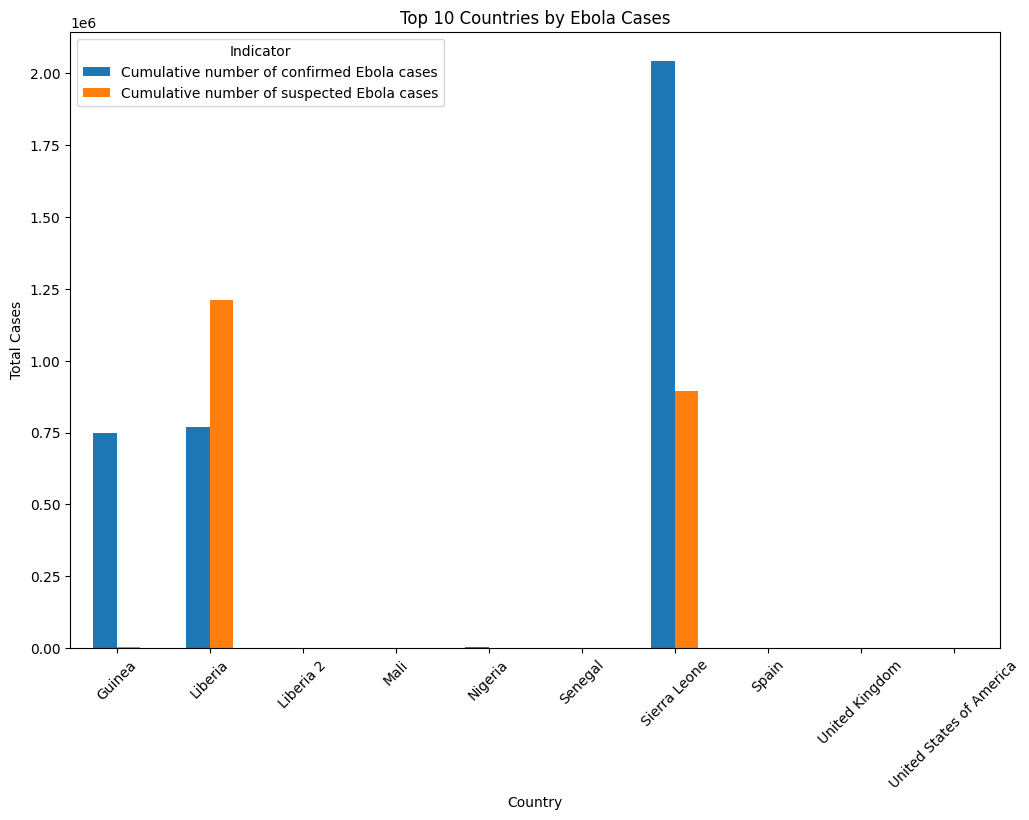

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate total confirmed Ebola cases by country
total_cases_by_country = df[df['Indicator'] == 'Cumulative number of confirmed Ebola cases'].groupby('Country')['value'].sum().reset_index().sort_values(by='value', ascending=False)

# Get the top 10 countries by confirmed Ebola cases
top_10_countries_confirmed = total_cases_by_country.head(10)['Country']

# Filter data for top 10 countries and relevant indicators
top_10_data = df[df['Country'].isin(top_10_countries_confirmed) & df['Indicator'].isin(['Cumulative number of confirmed Ebola cases', 'Cumulative number of suspected Ebola cases'])]

# Group by country and indicator
grouped_data = top_10_data.groupby(['Country', 'Indicator'])['value'].sum().unstack()

# Plot
grouped_data.plot(kind='bar', figsize=(12, 8))
plt.title('Top 10 Countries by Ebola Cases')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.show()

# The second plot block is a duplicate, removing it.